 # Tarea 8.6 #
 ### Moisés Echeverría ###
 #### FIS1344 - Métodos númericos y probabilidades ####

"Los siguientes datos corresponden al cálculo numérico de una cierta propiedad estadística de la distribución de materia en el universo (el espectro de potencias) $P(k)$ en función del modo de Fourier $k$. Use la derivada numérica para encontrar $d\ln P/d\ln k$ en cada punto. Para estimar el error cometido en esta derivada numérica compare el resultado de la fórmula a tres puntos con el resultado de la fórmula a cinco puntos. Será necesario usar las fórmulas a tres y cinco puntos en los extremos que se encuentran en este mismo notebook."

In [4]:
datos = np.array([       [5.531683013105e-04,       1.070304113861e+12], 
       [5.910227121702e-04,       1.139622191891e+12], 
       [6.315688849627e-04,       1.213481232452e+12], 
       [6.750065137883e-04,       1.292169597309e+12], 
       [7.215301959429e-04,       1.375954296780e+12], 
       [7.713235180257e-04,       1.465069697719e+12], 
       [8.245525173319e-04,       1.559705507566e+12], 
       [8.813589235833e-04,       1.659994890361e+12], 
       [9.418537183337e-04,       1.766003776663e+12], 
       [1.006111625261e-03,       1.877722471320e+12], 
       [1.074167130425e-03,       1.995060685935e+12], 
       [1.146012510269e-03,       2.117846703996e+12], 
       [1.221598126720e-03,       2.245831037960e+12], 
       [1.300834972303e-03,       2.378694410099e+12], 
       [1.383599172303e-03,       2.516052095865e+12], 
       [1.469737934874e-03,       2.657475892684e+12], 
       [1.559076324033e-03,       2.802524407596e+12], 
       [1.651424225675e-03,       2.950729179407e+12], 
       [1.746582964833e-03,       3.101618970269e+12], 
       [1.844351177716e-03,       3.254730780491e+12], 
       [1.944529704896e-03,       3.409618695392e+12], 
       [2.046925420592e-03,       3.565860320889e+12], 
       [2.151354028418e-03,       3.723061333248e+12], 
       [2.257641930146e-03,       3.880858018481e+12] ])

In [5]:
import numpy as np #importamos lo necesario
import matplotlib.pyplot as plt

In [86]:
def deriv3_datos(fxo, fx2, h):  
    return (fx2 - fxo)/(2*h)

def deriv3_borde_datos(fxo, fx1, fx2, h):      #la funcion de la derivada numerica del profe
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

def deriv_datos(fx, h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_borde_datos(fx[0], fx[1], fx[2], h)
        elif i == n - 1:
            deriv[i] = deriv3_borde_datos(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv
    return (fx2 - fxo)/(2*h)

In [87]:
def deriv5_datos(fxo,fx1,fx3,fx4,h):
    return (fxo-8*fx1+8*fx3-fx4)/(12*h)

def deriv5_borde_datos(fxo,fx1,fx2,fx3,fx4,h):          #la funcion modificada para 5 puntos
    return (-25*fxo+48*fx1-36*fx2+16*fx3-3*fx4)/(12*h)
    
def deriv_datos5(fx,h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i < 1:
            deriv[i] = deriv5_borde_datos(fx[0], fx[1], fx[2],fx[3],fx[4],h)
        elif i > n - 3:
            deriv[i] = deriv5_borde_datos(fx[n-3], fx[n-4], fx[n-5],fx[n-6],fx[n-7],-h)
        else:
            deriv[i] = deriv5_datos(fx[i-2],fx[i-1], fx[i+1],fx[i+2], h)
    return deriv

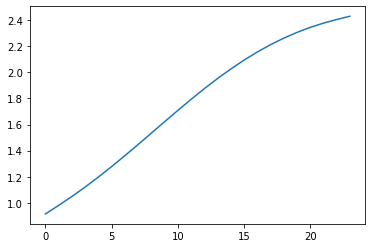

In [28]:
logders = deriv_datos(datos[:,1],h)*datos[:,0]/datos[:,1]
plt.plot(logders)

In [17]:
Datos_p=datos[:,[0]] #estos datos son los de P debido a que es una probabilidad y estan entre 0 y 1
Datos_k=datos[:,[1]] #y estos son los datos de k por descarte
P=np.transpose(Datos_p,(1,0))
K=np.transpose(Datos_k,(1,0))

Si derivamos la expresion nos queda como 
$$
\frac{d(ln(P))} {d(ln(K))} =\frac{K}{P}\frac{dP}{dK}
$$


In [9]:
h=100
Derivada_p3k=deriv_datos(Datos_k,h)# derivada de los datos k
Derivada_p3p=deriv_datos(Datos_p,h)# derivada de los datos p
Derivada_completa_3p=(K/P)*(Derivada_p3p/Derivada_p3k) #Derivada utilizando la expresion que resulta de la derivada
Derivada_completa_3p                                   #analitica de la formula que nos entregan con 3 puntos

array([[1.05356428, 1.05585044, 1.05779873, 1.05995141, 1.06232455,
        1.06493435, 1.06779716, 1.07092935, 1.07434727, 1.07806689,
        1.08210331, 1.08647009, 1.09117817, 1.09626381, 1.10174904,
        1.10756023, 1.11368225, 1.12015684, 1.12698012, 1.13414734,
        1.14165323, 1.14949172, 1.1576559 , 1.16579381]])

In [10]:
h=100
Derivada_p5k=deriv_datos5(Datos_k,h)# derivada de los datos k
Derivada_p5p=deriv_datos5(Datos_p,h)# derivada de los datos p
Derivada_completa_5p=(K/P)*(Derivada_p5p/Derivada_p5k) #Derivada utilizando la expresion que resulta de la derivada
Derivada_completa_5p                                   #analitica de la formula que nos entregan con 5 puntos

array([[1.05392715, 1.14111918, 1.05761276, 1.05975382, 1.06211604,
        1.06471592, 1.06757017, 1.07069542, 1.07410831, 1.07782507,
        1.08186097, 1.08622977, 1.09093751, 1.0960263 , 1.10153267,
        1.10735807, 1.11348477, 1.1199721 , 1.12680857, 1.13398912,
        1.14150832, 1.14935996, 1.14177978, 1.13414017]])

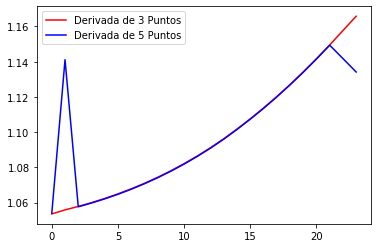

In [11]:
plt.plot(np.transpose(Derivada_completa_3p),label='Derivada de 3 Puntos',color='red')
plt.plot(np.transpose(Derivada_completa_5p),label='Derivada de 5 Puntos',color='blue')
plt.legend()

Si miramos el grafico nos podemos dar cuenta que el error entre la derivada de 3 puntos y la de 5 puntos es más grande al inicio y al final, esto se puede deber a que son puntos muy lejanos al experimento que estamos evaluando por tanto tienen un margen de error, si observamos los datos también nos podemos dar cuenta de esta problemática debido a que existen diferencias grandes entre los primeros valores.


In [22]:
Error=np.transpose(Derivada_completa_5p)-np.transpose(Derivada_completa_3p)/np.transpose(Derivada_completa_3p)

In [23]:
Error

array([[0.05392715],
       [0.14111918],
       [0.05761276],
       [0.05975382],
       [0.06211604],
       [0.06471592],
       [0.06757017],
       [0.07069542],
       [0.07410831],
       [0.07782507],
       [0.08186097],
       [0.08622977],
       [0.09093751],
       [0.0960263 ],
       [0.10153267],
       [0.10735807],
       [0.11348477],
       [0.1199721 ],
       [0.12680857],
       [0.13398912],
       [0.14150832],
       [0.14935996],
       [0.14177978],
       [0.13414017]])

En este error relativo podemos dar cuenta del error que existe en el gráfico y como el error va aumentando a medida que los valores se hacen más altos.

# Calificacion: 6.0

Cuidado con el orden del codigo, se usa numpy en la primera celda pero se importa en la segunda.

El espectro de potencias no es una probabilidad. Viene de calcular el segundo momento estadistico de las fluctuaciones en la densidad del Universo.

h es la distancia entre un dado y otro, no se porque le pusiste que era 100. Se puede calcular asi:

In [81]:
h = datos[1,0] - datos[0,0]
h

3.785441085969992e-05

La derivada $\frac{dP}{dk}$ es la derivada de $P$ respecto a $k$, lo que es lo mismo que derivar los datos usando la formula correspondiente. No era necesario derivar $k$. Abajo te dejo el codigo corregido

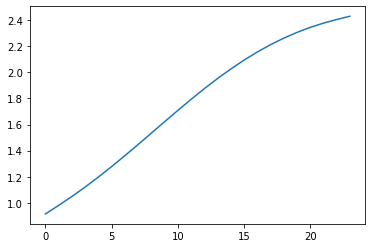

In [93]:
Derivada_completa_3p=deriv_datos(datos_p,h)*Datos_p/Datos_k
plt.plot(Derivada_completa_3p)

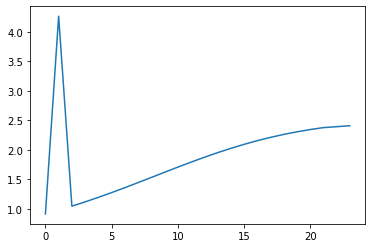

In [94]:
Derivada_completa_5p=deriv_datos5(datos_p,h)*Datos_p/Datos_k
plt.plot(Derivada_completa_5p)

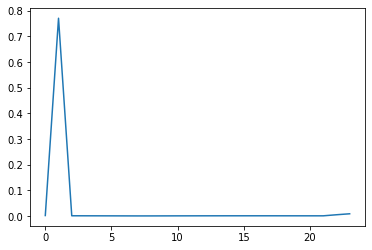

In [95]:
plt.plot(np.abs(Derivada_completa_5p-Derivada_completa_3p)/Derivada_completa_5p)